In [2]:
import numpy
import pandas as pd 
import pandas_datareader as dr 
from itertools import cycle
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import talib
import csv
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.pylab import date2num
%matplotlib inline

In [4]:
# grab stock data from yahoo finance within or start and end range which can be adjusted 
# use dataframe to extract adj close and push to csv file
MSFT = dr.data.get_data_yahoo('msft',start='2015-01-01', end='2020-12-11')
TSLA = dr.data.get_data_yahoo('tsla',start='2015-01-01', end='2020-12-11')
JNJ  = dr.data.get_data_yahoo('jnj',start='2015-01-01', end='2020-12-11')
FB   = dr.data.get_data_yahoo('fb',start='2015-01-01', end='2020-12-11')
NVDA = dr.data.get_data_yahoo('nvda',start='2015-01-01', end='2020-12-11')
df = pd.DataFrame({ 'FB': FB['Adj Close'],
                   'NVDA': NVDA['Adj Close'], 'MSFT': MSFT['Adj Close'],
                    'JNJ': JNJ['Adj Close'], 'TSLA':TSLA['Adj Close']})


df.to_csv("ClosingPrice.csv", encoding='utf-8', index=True)
MSFT.to_csv("msft.csv", encoding='utf-8', index=False)
TSLA.to_csv("tsla.csv", encoding='utf-8', index=False)
JNJ.to_csv("jnj.csv", encoding='utf-8', index=False)
FB.to_csv("fb.csv", encoding='utf-8', index=False)
NVDA.to_csv("nvda.csv", encoding='utf-8', index=False)
print("Files Saved")
df.tail()

Files Saved


,FB,NVDA,MSFT,JNJ,TSLA
Date,,,,,
2020-12-07,285.579987,544.270020,214.289993,148.970001,641.760010
2020-12-08,283.399994,534.000000,216.009995,151.550003,649.880005
2020-12-09,277.920013,517.229980,211.800003,153.100006,604.479980
2020-12-10,277.119995,518.890015,210.520004,152.250000,627.070007
2020-12-11,273.549988,520.530029,213.259995,152.949997,609.989990


In [5]:
# using TA-LIB to perform technical analysis of financial market data
def indicators(data):
    # Get Moving Average Convergence Divergence 
    data["macd"], data["macd_signal"], data["macd_hist"] = talib.MACD(data['Close'])
    
    # Get 10, 30, and 50 day moving averages 
    data["ma10"] = talib.MA(data["Close"], timeperiod=10)
    data["ma30"] = talib.MA(data["Close"], timeperiod=30)
    data["ma50"] = talib.MA(data["Close"], timeperiod=50)
    
    # Get relative strength index 
    data["rsi"] = talib.RSI(data["Close"])
    return data

In [6]:
#macd, moving averages, and rsi indicators all in separate stock csv files that we use to plot our indicators to make predictions
msft_indicators = indicators(MSFT)
tsla_indicators = indicators(TSLA)
jnj_indicators  = indicators(JNJ)
fb_indicators   = indicators(FB)
nvda_indicators = indicators(NVDA)
msft_indicators,tsla_indicators, jnj_indicators, fb_indicators, nvda_indicators
msft_indicators.to_csv("msft_indicators.csv", encoding='utf-8', index=True)
tsla_indicators.to_csv("tsla_indicators.csv", encoding='utf-8', index=True)
jnj_indicators.to_csv("jnj_indicators.csv", encoding='utf-8', index=True)
fb_indicators.to_csv("fb_indicators.csv", encoding='utf-8', index=True)
nvda_indicators.to_csv("nvda_indicators.csv", encoding='utf-8', index=True)
print("Files Saved")

Files Saved


In [7]:
# plot moving averages 
def plot_ma(data, n, ticker):

    data = data.iloc[-n:]
    
    fig = plt.figure()
    fig.set_size_inches((10, 8))
    ax_candle = fig.add_axes((0, 0.72, 1, 0.32))
    ax_candle.xaxis_date()
    
    # Get list of date, open, high, low and close prices
    ohlc = []
    for date, row in data.iterrows():
        openp, highp, lowp, closep = row[:4]
        ohlc.append([date2num(date), openp, highp, lowp, closep])
 
    # Plot candlestick chart of moving averages
    ax_candle.plot(data.index, data["ma10"], label="MA10-"+ticker)
    ax_candle.plot(data.index, data["ma30"], label="MA30-"+ticker)
    ax_candle.plot(data.index, data["ma50"], label="MA50-"+ticker)
    candlestick_ohlc(ax_candle, ohlc, colorup="g", colordown="r", width=0.8)
    ax_candle.legend()
    
    plt.show()

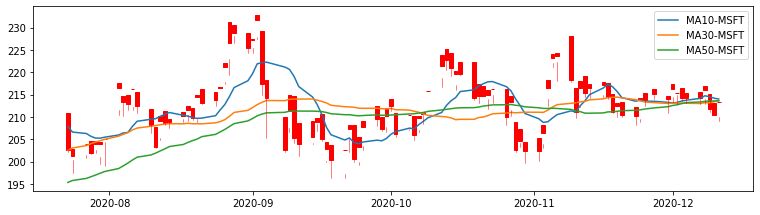

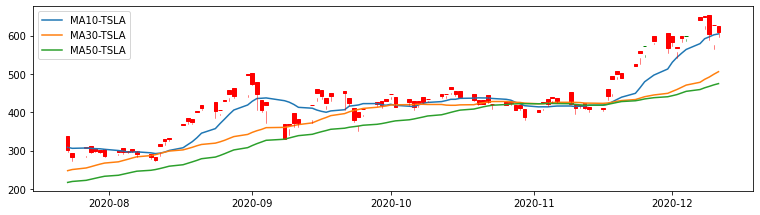

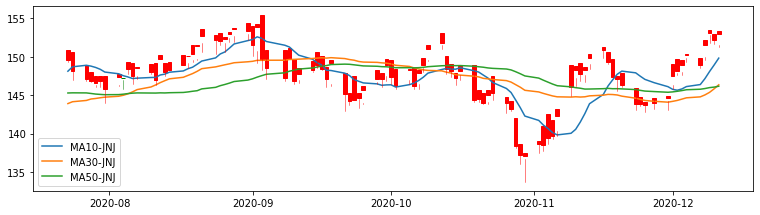

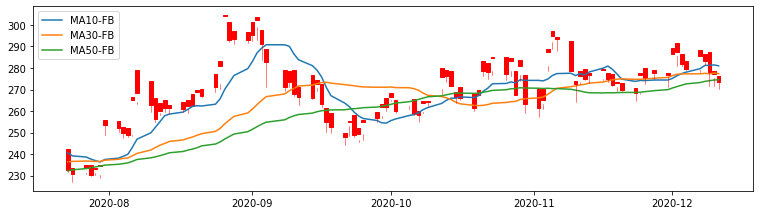

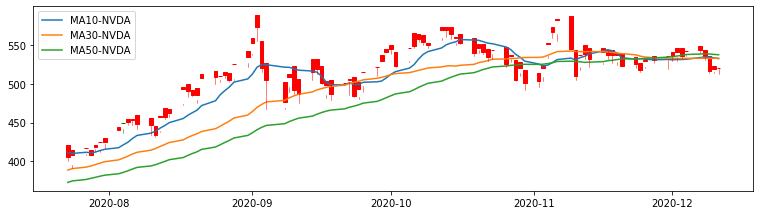

In [8]:
plot_ma(msft_indicators, 100, "MSFT")
plot_ma(tsla_indicators, 100, "TSLA")
plot_ma(jnj_indicators, 100, "JNJ")
plot_ma(fb_indicators, 100, "FB")
plot_ma(nvda_indicators, 100, "NVDA")

In [9]:
# plot moving average convergence divergence 
def plot_macd(data, n, ticker):

    data = data.iloc[-n:]
    
    fig = plt.figure()
    fig.set_size_inches((10, 8))
    ax_macd = fig.add_axes((0, 0.48, 1, 0.2))
 
 
    # Plot MACD
    ax_macd.plot(data.index, data["macd"], label="macd-"+ticker)
    ax_macd.bar(data.index, data["macd_hist"] * 3, label="hist")
    ax_macd.plot(data.index, data["macd_signal"], label="signal")
    ax_macd.legend()
    
    plt.show()


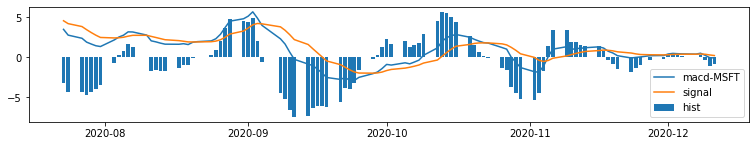

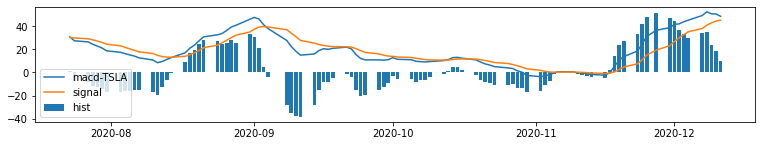

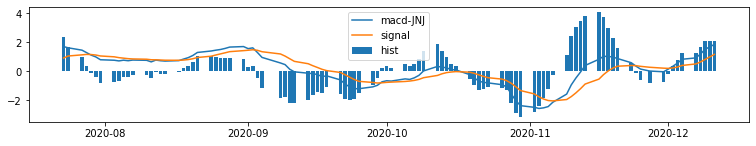

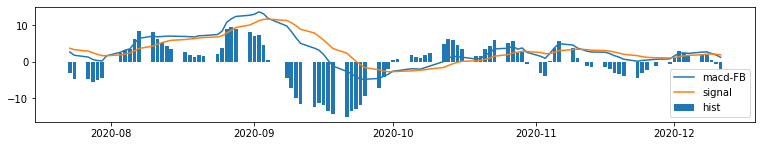

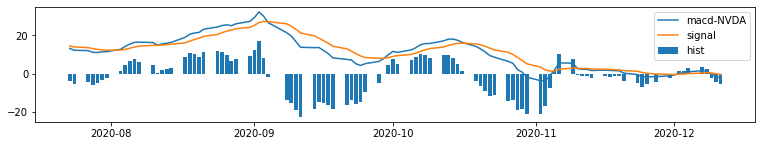

In [10]:
plot_macd(msft_indicators, 100, "MSFT")
plot_macd(tsla_indicators, 100, "TSLA")
plot_macd(jnj_indicators, 100, "JNJ")
plot_macd(fb_indicators, 100, "FB")
plot_macd(nvda_indicators, 100, "NVDA")

In [11]:
# plot relative strength index 
def plot_rsi(data, n, ticker):
    data = data.iloc[-n:]
    fig = plt.figure()
    fig.set_size_inches((10, 8))
    ax_rsi = fig.add_axes((0, 0.24, 1, 0.2))
    # Plot RSI- above 70% = overbought, below 30% = oversold
    ax_rsi.set_ylabel("(%)")
    ax_rsi.plot(data.index, [70] * len(data.index), label="overbought")
    ax_rsi.plot(data.index, [30] * len(data.index), label="oversold")
    ax_rsi.plot(data.index, data["rsi"], label="rsi-"+ticker)
    ax_rsi.legend()
    plt.show()

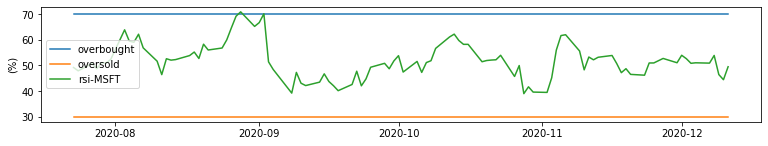

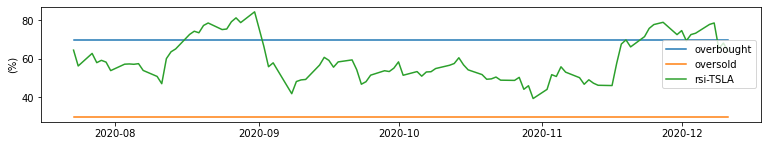

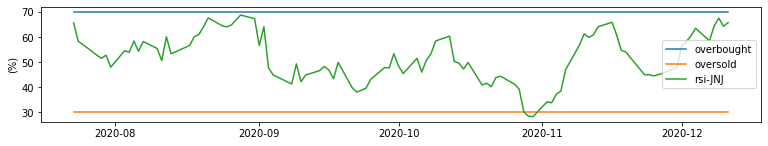

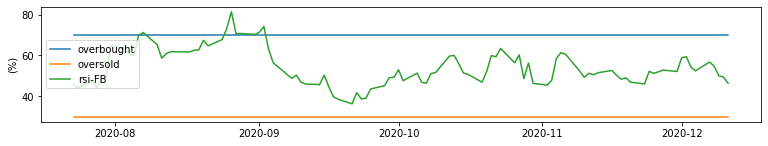

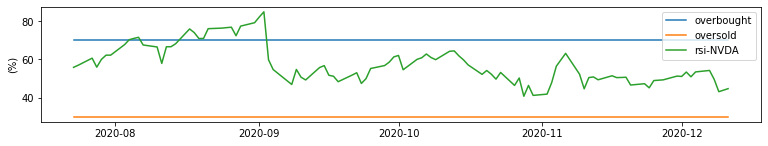

In [12]:
plot_rsi(msft_indicators, 100, "MSFT")
plot_rsi(tsla_indicators, 100, "TSLA")
plot_rsi(jnj_indicators, 100, "JNJ")
plot_rsi(fb_indicators, 100, "FB")
plot_rsi(nvda_indicators, 100, "NVDA")

In [13]:
# plot volume
def plot_volume(data, n, ticker):

    data = data.iloc[-n:]
    fig = plt.figure()
    fig.set_size_inches((10, 8))
    ax_vol = fig.add_axes((0, 0, 1, 0.2))
    # Plot volume in millions
    ax_vol.bar(data.index, data["Volume"] / 1000000)
    ax_vol.set_ylabel("Millions")
    ax_vol.set_xlabel("Volume-"+ticker)
    plt.show()

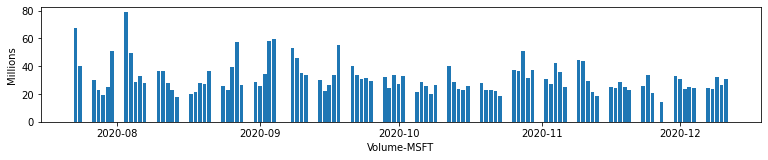

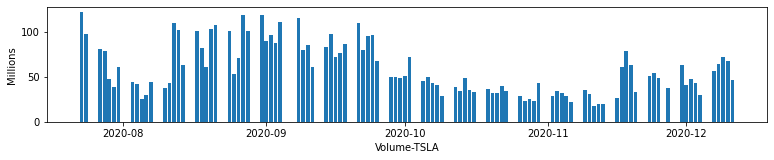

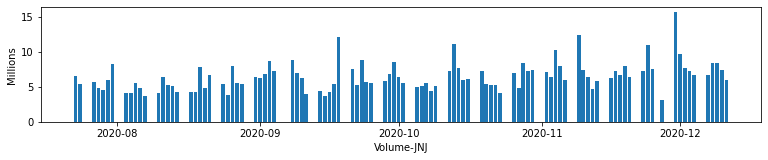

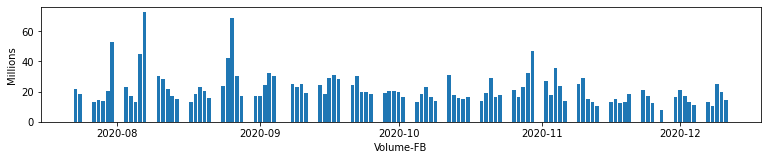

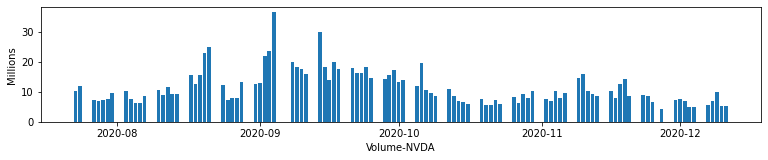

In [14]:
plot_volume(msft_indicators, 100, "MSFT")
plot_volume(tsla_indicators, 100, "TSLA")
plot_volume(jnj_indicators, 100, "JNJ")
plot_volume(fb_indicators, 100, "FB")
plot_volume(nvda_indicators, 100, "NVDA")

In [15]:
# Plot Exponential Moving Average - 10, 50 and 200 day 
def EMA(stock_list, days_list, name_list):
    from itertools import cycle
    color = cycle('grc')

    for index,stock in enumerate(stock_list):
        fig, ax = plt.subplots(figsize=(6,4))
        stock['Adj Close'].plot(title = name_list[index], label= 'Adj Close', color='b', legend=True, ax=ax)    
        for day in days_list:    
            stock['Adj Close'].ewm(com=day).mean().plot(label= 'expMA_' + str(day) + 'day', color= next(color), legend=True, ax=ax)
            ax.set_xlabel('trading days')
            ax.set_ylabel('price')  

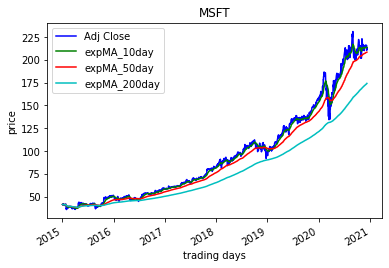

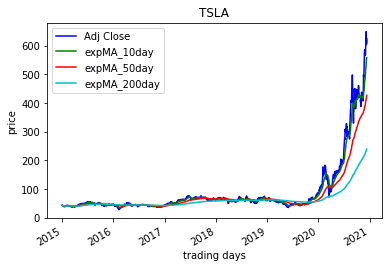

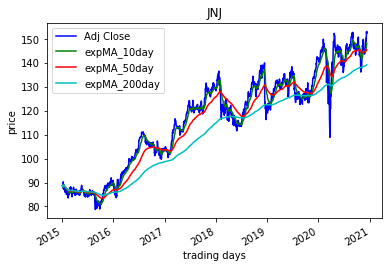

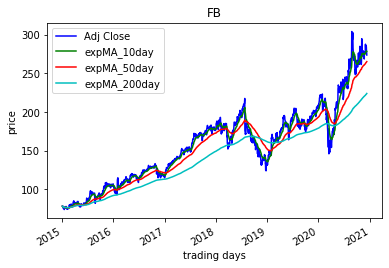

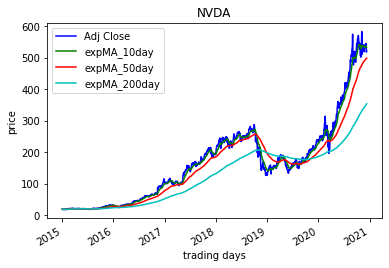

In [16]:
EMA(stock_list = [MSFT, TSLA, JNJ, FB, NVDA], name_list = ['MSFT', 'TSLA', 'JNJ', 'FB', 'NVDA'], days_list = [10,50,200])    


Chart Saved


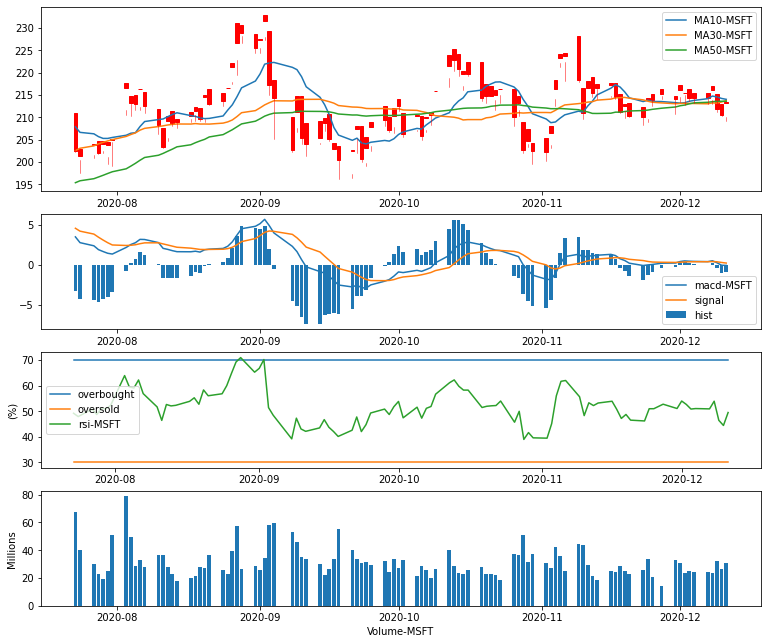

Chart Saved


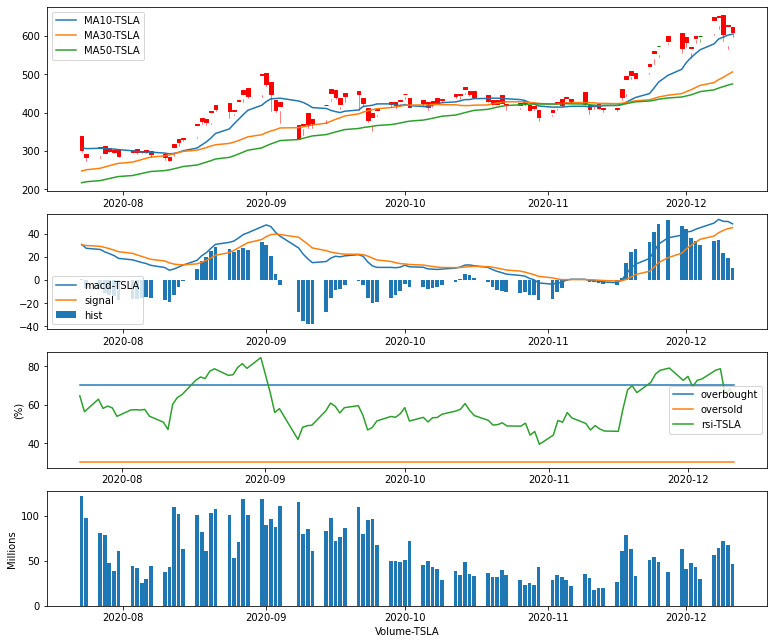

Chart Saved


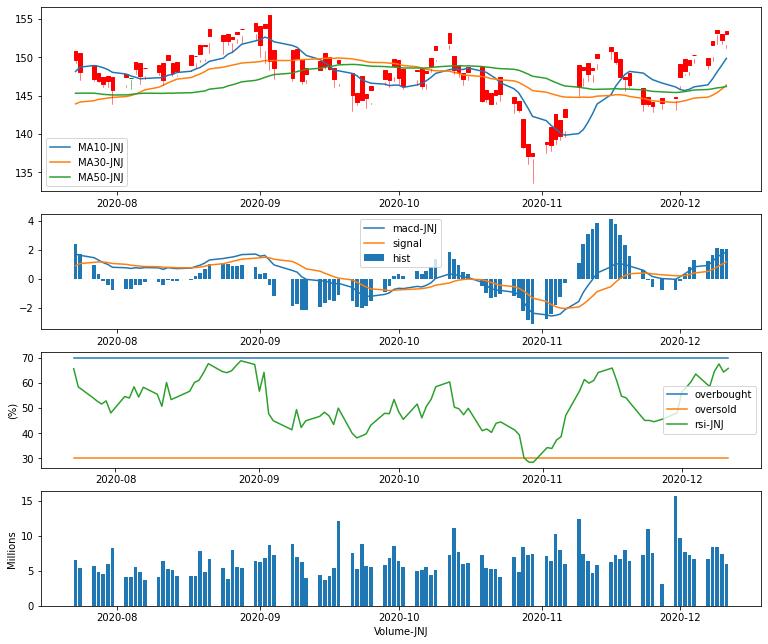

Chart Saved


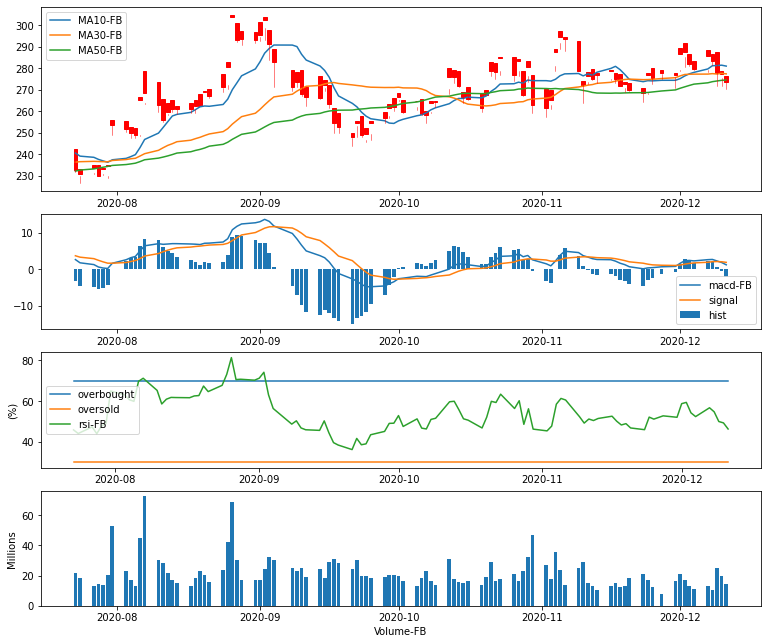

Chart Saved


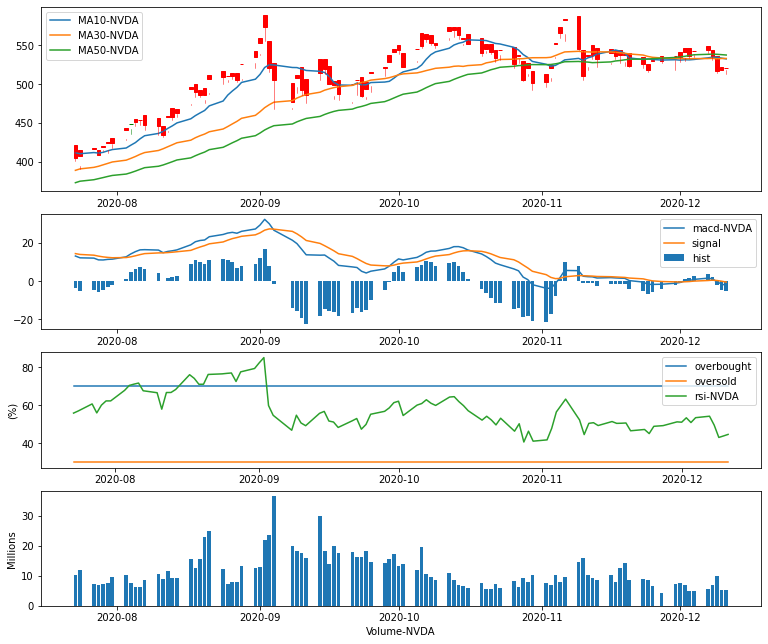

In [17]:
# all together
def plot_charts(data, n, ticker):

    data = data.iloc[-n:]
    fig = plt.figure()
    fig.set_size_inches((10, 8))
    ax_candle = fig.add_axes((0, 0.72, 1, 0.32))
    ax_macd = fig.add_axes((0, 0.48, 1, 0.2))
    ax_rsi = fig.add_axes((0, 0.24, 1, 0.2))
    ax_vol = fig.add_axes((0, 0, 1, 0.2))
    ax_candle.xaxis_date()
    
    ohlc = []
    for date, row in data.iterrows():
        openp, highp, lowp, closep = row[:4]
        ohlc.append([date2num(date), openp, highp, lowp, closep])
 
    # Moving Averages
    ax_candle.plot(data.index, data["ma10"], label="MA10-"+ticker)
    ax_candle.plot(data.index, data["ma30"], label="MA30-"+ticker)
    ax_candle.plot(data.index, data["ma50"], label="MA50-"+ticker)
    candlestick_ohlc(ax_candle, ohlc, colorup="g", colordown="r", width=0.8)
    ax_candle.legend()
    #MACD
    ax_macd.plot(data.index, data["macd"], label="macd-"+ticker)
    ax_macd.bar(data.index, data["macd_hist"] * 3, label="hist")
    ax_macd.plot(data.index, data["macd_signal"], label="signal")
    ax_macd.legend()
    # RSI
    ax_rsi.set_ylabel("(%)")
    ax_rsi.plot(data.index, [70] * len(data.index), label="overbought")
    ax_rsi.plot(data.index, [30] * len(data.index), label="oversold")
    ax_rsi.plot(data.index, data["rsi"], label="rsi-"+ticker)
    ax_rsi.legend()
    # Volume
    ax_vol.bar(data.index, data["Volume"] / 1000000)
    ax_vol.set_ylabel("Millions")
    ax_vol.set_xlabel("Volume-"+ticker)
       
    # Save chart as PNG
    fig.savefig(ticker + ".png", bbox_inches="tight")
    print('Chart Saved')
    
    plt.show()
plot_charts(msft_indicators, 100, "MSFT")
plot_charts(tsla_indicators, 100, "TSLA")
plot_charts(jnj_indicators, 100, "JNJ")
plot_charts(fb_indicators, 100, "FB")
plot_charts(nvda_indicators, 100, "NVDA")
